In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.models import load_model

from keras.utils import plot_model
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Format our training data by Normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

In [5]:
# Now we one hot encode outputs
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

In [6]:
num_classes= y_test_oh.shape[1]
print ("Number of Classes: " + str(num_classes))

Number of Classes: 10


In [7]:
def convnet():
    model = Sequential([
    # Padding = 'same'  results in padding the input such that
    # the output has the same length as the original input
    Conv2D(32, (3, 3), activation='relu',padding='same',input_shape=x_train.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu',padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
    ])
    return model

In [8]:
model = convnet()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [9]:
batch_size = 32
num_classes = 10
epochs = 50

In [10]:
# Let's create our model
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

In [11]:
history = model.fit(x_train, y_train_oh, batch_size=batch_size, epochs=epochs,
                  validation_data=(x_test, y_test_oh),
                  shuffle=True, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 56s 1ms/step - loss: 1.5195 - acc: 0.4483 - val_loss: 1.1370 - val_acc: 0.5911
Epoch 2/50
50000/50000 [==============================] - 49s 978us/step - loss: 1.1252 - acc: 0.5992 - val_loss: 0.9942 - val_acc: 0.6484
Epoch 3/50
50000/50000 [==============================] - 49s 973us/step - loss: 0.9650 - acc: 0.6619 - val_loss: 0.8610 - val_acc: 0.6952
Epoch 4/50
50000/50000 [==============================] - 49s 972us/step - loss: 0.8733 - acc: 0.6980 - val_loss: 0.7869 - val_acc: 0.7227
Epoch 5/50
50000/50000 [==============================] - 44s 888us/step - loss: 0.8091 - acc: 0.7140 - val_loss: 0.7631 - val_acc: 0.7352
Epoch 6/50
50000/50000 [==============================] - 42s 840us/step - loss: 0.7635 - acc: 0.7340 - val_loss: 0.7684 - val_acc: 0.7348
Epoch 7/50
50000/50000 [==============================] - 47s 939us/step - loss: 0.7270 - acc: 0.7465 - val_loss: 0.71

In [12]:
scores = model.evaluate(x_test, y_test_oh, batch_size=256, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

10000/10000 [==============================] - 2s 241us/step

Test result: 79.900 loss: 0.644


In [13]:
model.save('cifar-10-cnn-model.h5')

In [14]:
y_pred = model.predict(x_test)

In [15]:
y_pred_label = np.argmax(y_pred, axis=1)

In [16]:
labels = {0: "airplane",
          1: "automobile",
          2: "bird",
          3: "cat",
          4: "deer",
          5: "dog",
          6: "frog",
          7: "horse",
          8: "ship",
          9: "truck"}

## Confusion Matrix

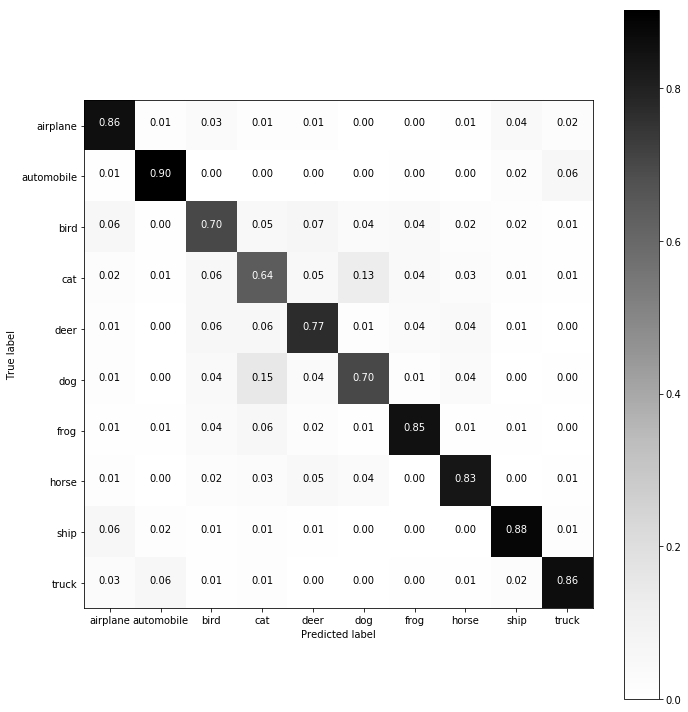

In [17]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_label)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
tick_marks = np.arange(10)
plt.xticks(tick_marks, [labels[i] for i in range(10)])
plt.yticks(tick_marks, [labels[i] for i in range(10)])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show();

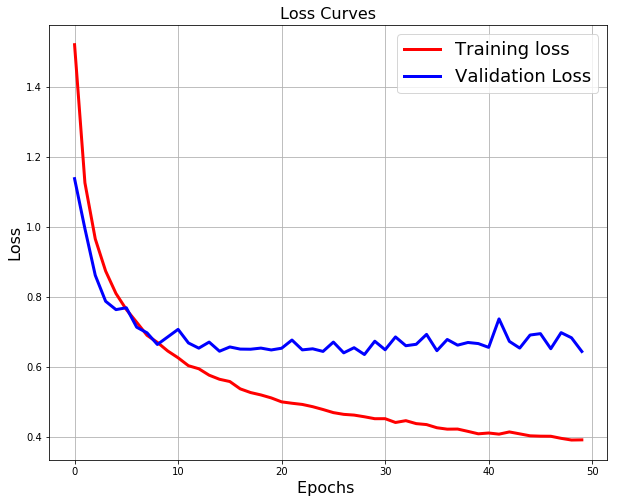

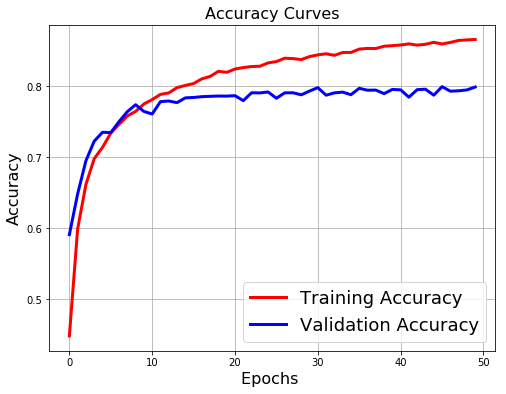

In [18]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16);

## Testing CNN model

In [19]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
classifier = load_model('cifar-10-cnn-model.h5')
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
              
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

<img src="CIFAR-10-Image-Classification-CNN.png">

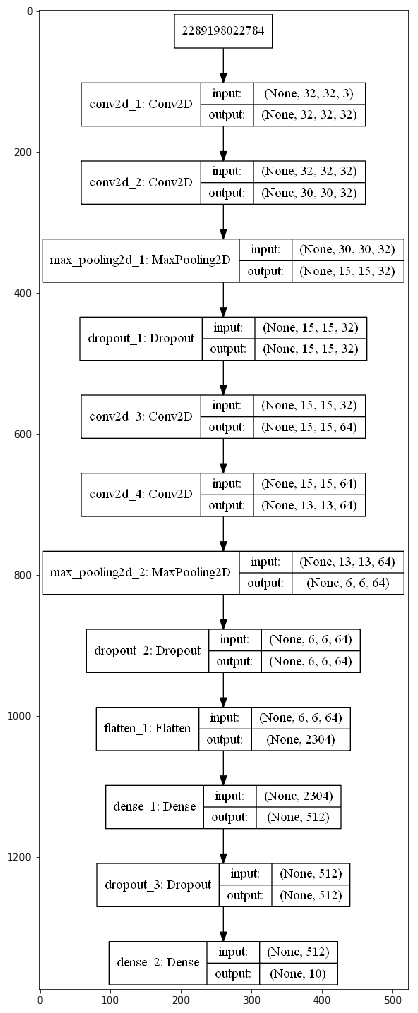

In [21]:
# Generate the plot
plot_model(model, to_file ='model_plot_cifar10_cnn.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot_cifar10_cnn.png')
plt.figure(figsize=(30,18))
imgplot = plt.imshow(img) 